In [31]:
import numpy as np
import h5py
import cv2
import os, sys
import argparse
from core.get_args import get_args
from core.produce_denoised_img import produce_denoised_img
from core.utils import TedataLoader
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
from core.watershed import watershed,watershed_per_img
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Take image

In [14]:
!ls /mnt/ssd/hyun/fbi-net/FBI-Denoiser/data/Samsung_SNU_1474x3010_aligned

SET1  SET2  SET3  SET4


In [16]:

debug = True
data_path = "/mnt/ssd/hyun/fbi-net/FBI-Denoiser/data/Samsung_SNU_1474x3010_aligned"for set_path in sorted(os.listdir(data_path)):
    if debug is True:
        print(set_path)
    set_path = os.path.join(data_path,set_path)
    img_list = sorted(os.listdir(set_path))
    img_list = list(filter(lambda x : ".ipynb_checkpoints" not in x,img_list))
    if debug is True:
        print(img_list)
    for img_path in img_list:
        img_path = os.path.join(set_path,img_path)
        if debug is True:
            print(img_path)
        img = cv2.imread(img_path,cv2.IMREAD_GRAYSCALE)
        if debug is True:
            print(img.shape)
        sys.exit(-1)

SET1
['F16_1.png', 'F16_10.png', 'F16_11.png', 'F16_12.png', 'F16_13.png', 'F16_14.png', 'F16_15.png', 'F16_16.png', 'F16_2.png', 'F16_3.png', 'F16_4.png', 'F16_5.png', 'F16_6.png', 'F16_7.png', 'F16_8.png', 'F16_9.png', 'F32_1.png', 'F32_10.png', 'F32_11.png', 'F32_12.png', 'F32_13.png', 'F32_14.png', 'F32_15.png', 'F32_16.png', 'F32_2.png', 'F32_3.png', 'F32_4.png', 'F32_5.png', 'F32_6.png', 'F32_7.png', 'F32_8.png', 'F32_9.png', 'F64_1.png', 'F64_10.png', 'F64_11.png', 'F64_12.png', 'F64_13.png', 'F64_14.png', 'F64_15.png', 'F64_16.png', 'F64_2.png', 'F64_3.png', 'F64_4.png', 'F64_5.png', 'F64_6.png', 'F64_7.png', 'F64_8.png', 'F64_9.png', 'F8_1.png', 'F8_10.png', 'F8_11.png', 'F8_12.png', 'F8_13.png', 'F8_14.png', 'F8_15.png', 'F8_16.png', 'F8_2.png', 'F8_3.png', 'F8_4.png', 'F8_5.png', 'F8_6.png', 'F8_7.png', 'F8_8.png', 'F8_9.png']
/mnt/ssd/hyun/fbi-net/FBI-Denoiser/data/Samsung_SNU_1474x3010_aligned/SET1/F16_1.png
(1474, 3010)


SystemExit: -1

In [17]:
def divide_okay(num):
    okay_arr = []
    mid = int(np.sqrt(num))+1
    for i in range(2,mid+1):
        if num % i == 0:
            okay_arr.append(i)
    print(okay_arr)
    return okay_arr
for i in img.shape:
    divide_okay(i)

[2, 11, 22]
[2, 5, 7, 10, 14, 35, 43]


In [22]:
pge_weight_dir = "221005_PGE_Net_Grayscale_Samsung_SET1_Noise_est_cropsize_256.w"
fbi_weight_dir = "../weights/221005_FBI_Net_Grayscale_Samsung_SET1_MSE_Affine_layers_x17_filters_x64_cropsize_256.w"
te_data_dir = f'../data/val_Samsung_SNU_patches_SET1.hdf5'
            
args = get_args()
args.pge_weight_dir = pge_weight_dir
args.loss_function = "MSE_Affine"
args.noise_type = 'Poisson-Gaussian'
args.model_type = 'FBI_Net'
args.set_num = '1'
args.data_name = 'Samsung'
args.data_type = 'Grayscale'
args.lr = 0.001
args.num_layers = 17
args.num_filters = 64
args.crop_size = 200
args.debug = False
args

Namespace(date='', seed=0, noise_type='Poisson-Gaussian', loss_function='MSE_Affine', model_type='FBI_Net', data_type='Grayscale', data_name='Samsung', nepochs=50, batch_size=4, lr=0.001, drop_rate=0.5, drop_epoch=10, crop_size=200, alpha=0.01, beta=0.02, num_layers=17, num_filters=64, mul=1, unet_layer=3, pge_weight_dir='221005_PGE_Net_Grayscale_Samsung_SET1_Noise_est_cropsize_256.w', output_type='sigmoid', sigmoid_value=0.1, use_other_target=False, x_f_num='F1', y_f_num='F64', integrate_all_set=False, set_num='1', test=False, train_with_MSEAffine=False, debug=False)

In [23]:

# te_data_loader = TedataLoader(te_data_dir, args)
# te_data_loader = DataLoader(te_data_loader, batch_size=1, shuffle=False, num_workers=0, drop_last=False)
# for batch_idx, (source, target) in enumerate(te_data_loader):
#     print(source.shape, target.shape)
#     break

num of test images :  1500
torch.Size([1, 1, 256, 256]) torch.Size([1, 2, 256, 256])


In [24]:
model = produce_denoised_img(_pge_weight_dir=pge_weight_dir,_fbi_weight_dir = fbi_weight_dir,_args = args)

output type : linear


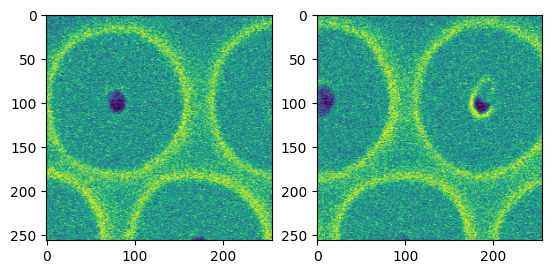

In [25]:
plt.subplot(121)
plt.imshow(img[:256,:256])
plt.subplot(122)
plt.imshow(img[:256,256:256*2])

In [26]:
denoised_img = model.eval(img)

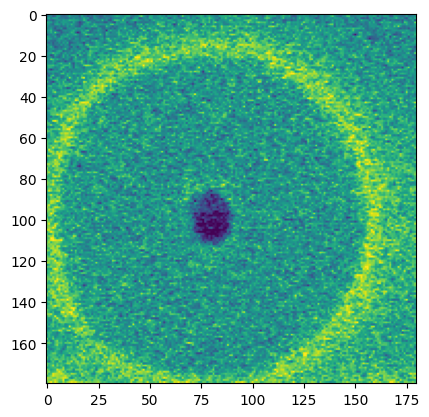

In [27]:
denoised_img_uint8 = (denoised_img*255).astype('uint8')
plt.imshow(img[:180,:180])

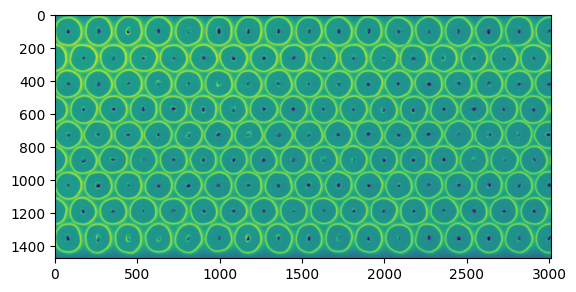

In [37]:
plt.imshow(denoised_img)

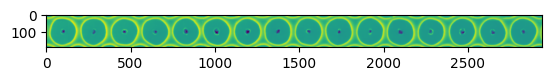

In [156]:
plt.imshow(denoised_img[160:350,70:])

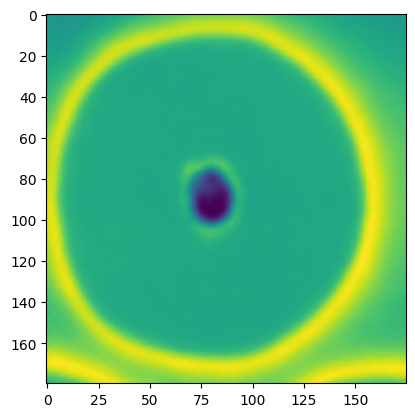

In [43]:
plt.imshow(denoised_img[10:190,:175])

In [28]:
denoised_img.shape,denoised_img.dtype,denoised_img.min(),denoised_img.max()

((1474, 3010), dtype('float32'), 0.0, 1.0)

In [29]:
debug = True
markers = watershed(denoised_img_uint8[5:190,540:720],debug)
print(np.unique(markers))
#markers[markers!=3] = 0
plt.imshow(markers)
plt.pause(0.01)
plt.plot(denoised_img_uint8[5:190,540:720][50])
plt.pause(0.01)
plt.plot(markers[50])

/mnt/ssd/hyun/fbi-net/env/lib/python3.9/site-packages/numpy/lib/arraysetops.py:272: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ar = np.asanyarray(ar)


ValueError: operands could not be broadcast together with shapes (185,180) (2,) 

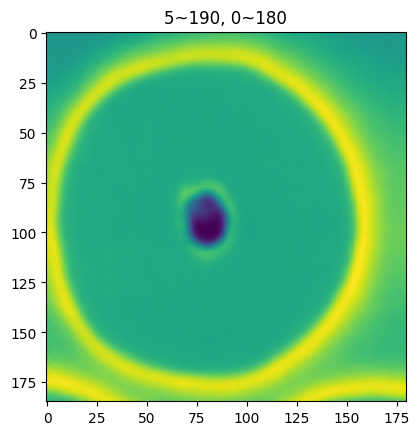

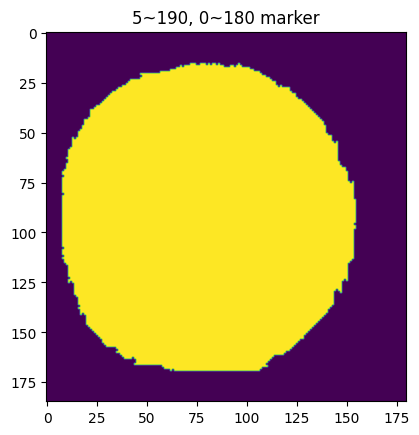

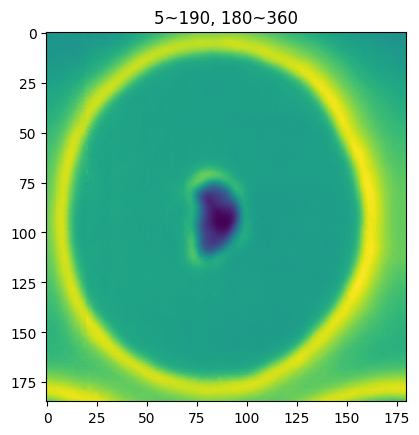

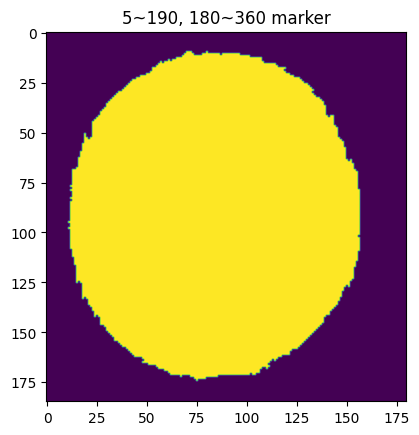

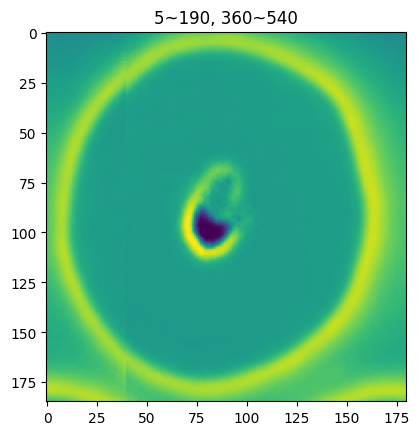

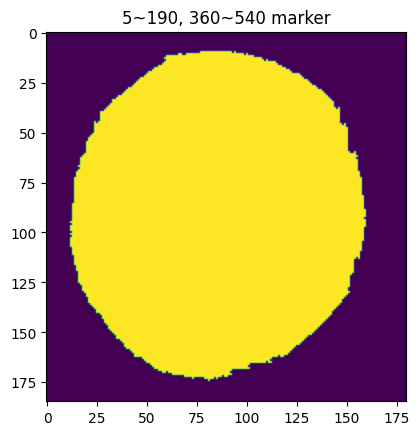

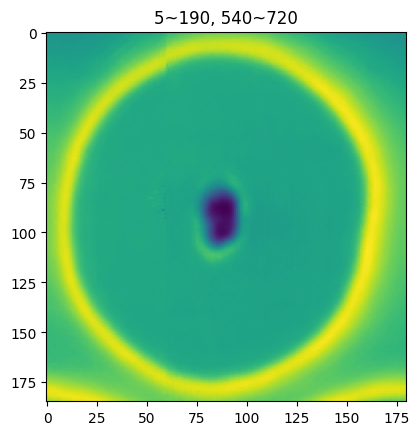

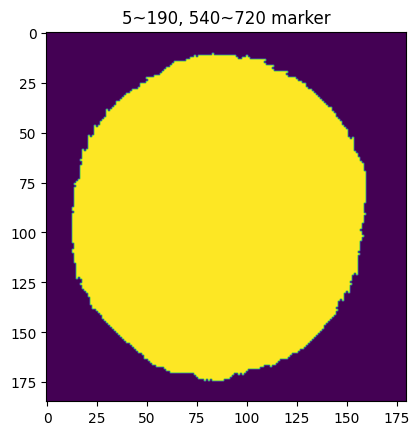

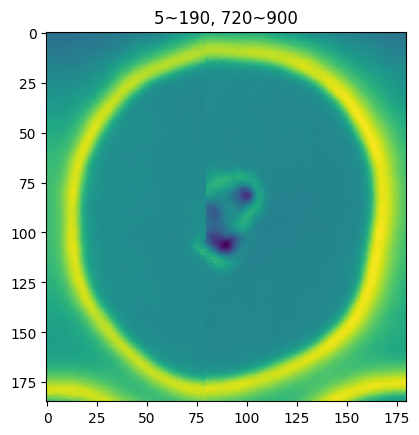

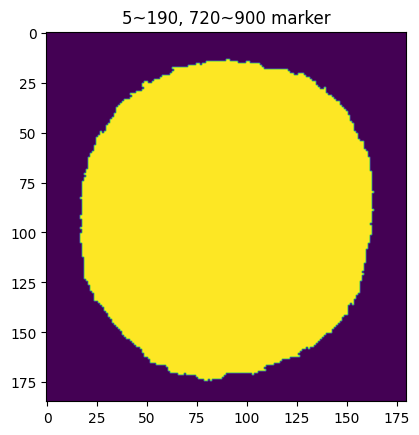

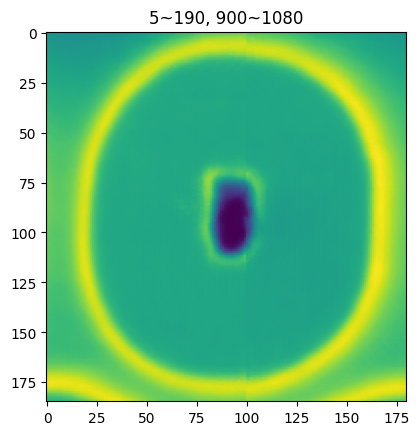

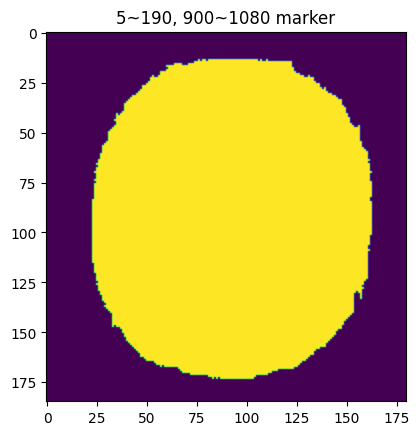

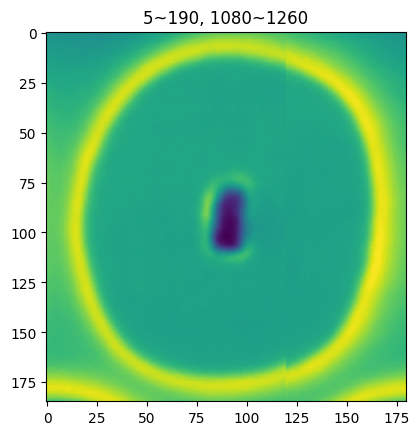

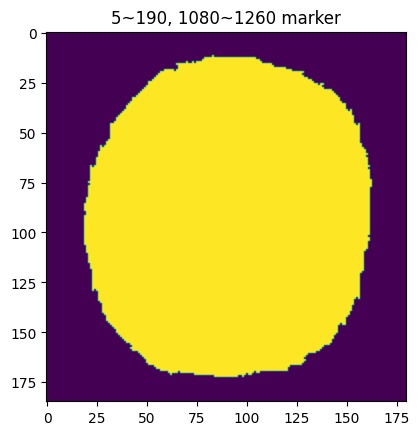

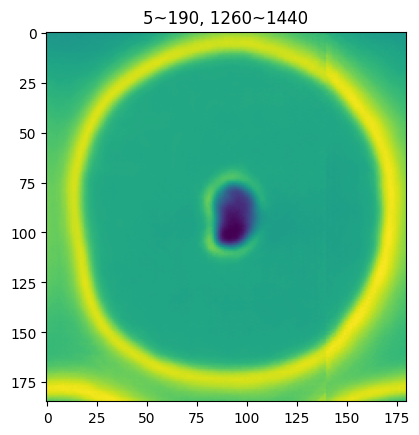

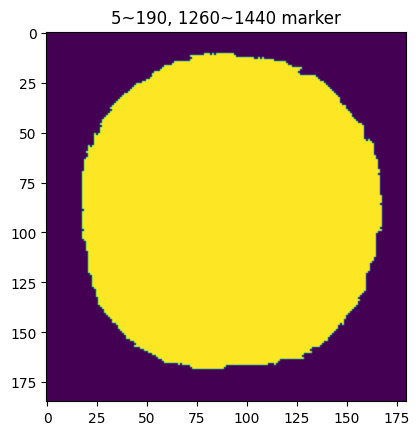

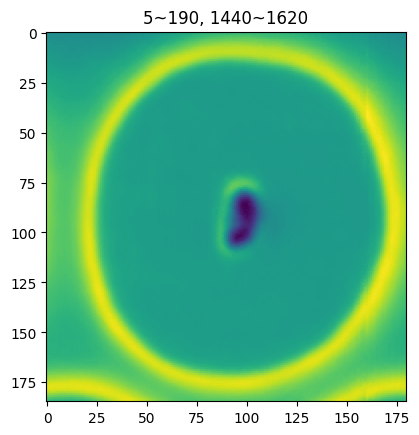

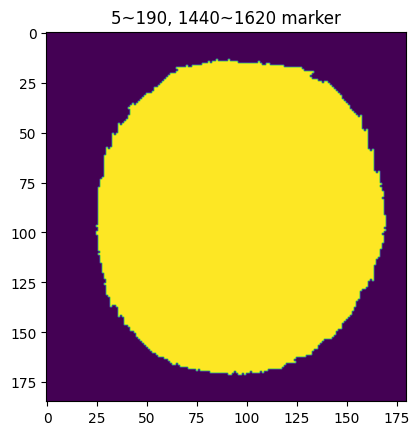

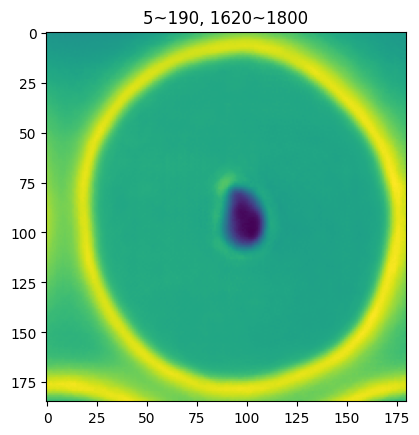

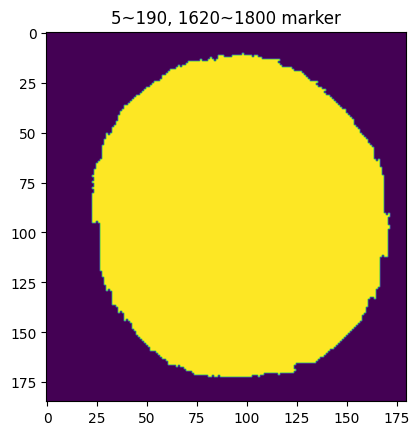

In [144]:
crop_size=256
for i in range(10):
    top = 5+180*i
    bottom = 10+ 180*(i+1)
    for j in range(10):
        left = 180*j
        right = 180*(j+1)
        img = denoised_img[top:bottom,left:right]
        img_uint8 = denoised_img_uint8[top:bottom,left:right]
        plt.title(f"{top}~{bottom}, {left}~{right}")
        plt.imshow(img)
        plt.pause(0.01)
    
        plt.title(f"{top}~{bottom}, {left}~{right} marker")
        markers = watershed(img_uint8,False)
        plt.imshow(markers)
        plt.pause(0.01)
        
        break
    #break

In [180]:
cv2.watershed?

Docstring:
watershed(image, markers) -> markers
.   @brief Performs a marker-based image segmentation using the watershed algorithm.
.   
.   The function implements one of the variants of watershed, non-parametric marker-based segmentation
.   algorithm, described in @cite Meyer92 .
.   
.   Before passing the image to the function, you have to roughly outline the desired regions in the
.   image markers with positive (\>0) indices. So, every region is represented as one or more connected
.   components with the pixel values 1, 2, 3, and so on. Such markers can be retrieved from a binary
.   mask using #findContours and #drawContours (see the watershed.cpp demo). The markers are "seeds" of
.   the future image regions. All the other pixels in markers , whose relation to the outlined regions
.   is not known and should be defined by the algorithm, should be set to 0's. In the function output,
.   each pixel in markers is set to a value of the "seed" components or to -1 at boundaries be

In [ ]:
data_path = "/mnt/ssd/hyun/fbi-net/FBI-Denoiser/data/Samsung_SNU_1474x3010_aligned"
debug = False

In [ ]:
cv2.adaptiveThreshold?

Docstring:
adaptiveThreshold(src, maxValue, adaptiveMethod, thresholdType, blockSize, C[, dst]) -> dst
.   @brief Applies an adaptive threshold to an array.
.   
.   The function transforms a grayscale image to a binary image according to the formulae:
.   -   **THRESH_BINARY**
.       \f[dst(x,y) =  \fork{\texttt{maxValue}}{if \(src(x,y) > T(x,y)\)}{0}{otherwise}\f]
.   -   **THRESH_BINARY_INV**
.       \f[dst(x,y) =  \fork{0}{if \(src(x,y) > T(x,y)\)}{\texttt{maxValue}}{otherwise}\f]
.   where \f$T(x,y)\f$ is a threshold calculated individually for each pixel (see adaptiveMethod parameter).
.   
.   The function can process the image in-place.
.   
.   @param src Source 8-bit single-channel image.
.   @param dst Destination image of the same size and the same type as src.
.   @param maxValue Non-zero value assigned to the pixels for which the condition is satisfied
.   @param adaptiveMethod Adaptive thresholding algorithm to use, see #AdaptiveThresholdTypes.
.   The #BORDER_REPLICATE

SET1
['F16_1.png', 'F16_10.png', 'F16_11.png', 'F16_12.png', 'F16_13.png', 'F16_14.png', 'F16_15.png', 'F16_16.png', 'F16_2.png', 'F16_3.png', 'F16_4.png', 'F16_5.png', 'F16_6.png', 'F16_7.png', 'F16_8.png', 'F16_9.png', 'F32_1.png', 'F32_10.png', 'F32_11.png', 'F32_12.png', 'F32_13.png', 'F32_14.png', 'F32_15.png', 'F32_16.png', 'F32_2.png', 'F32_3.png', 'F32_4.png', 'F32_5.png', 'F32_6.png', 'F32_7.png', 'F32_8.png', 'F32_9.png', 'F64_1.png', 'F64_10.png', 'F64_11.png', 'F64_12.png', 'F64_13.png', 'F64_14.png', 'F64_15.png', 'F64_16.png', 'F64_2.png', 'F64_3.png', 'F64_4.png', 'F64_5.png', 'F64_6.png', 'F64_7.png', 'F64_8.png', 'F64_9.png', 'F8_1.png', 'F8_10.png', 'F8_11.png', 'F8_12.png', 'F8_13.png', 'F8_14.png', 'F8_15.png', 'F8_16.png', 'F8_2.png', 'F8_3.png', 'F8_4.png', 'F8_5.png', 'F8_6.png', 'F8_7.png', 'F8_8.png', 'F8_9.png']
/mnt/ssd/hyun/fbi-net/FBI-Denoiser/data/Samsung_SNU_1474x3010_aligned/SET1/F16_1.png
(1474, 3010)
F16_1.png


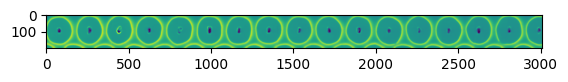

[-1  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17]
cricle_value is 10
79 93


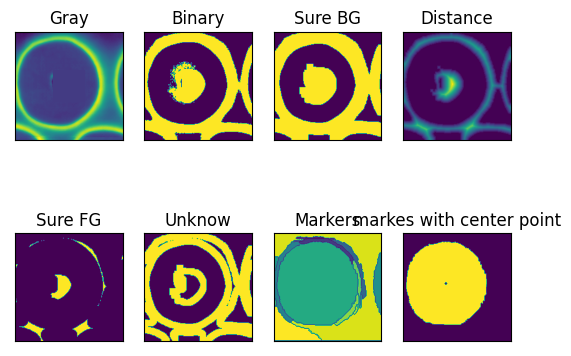

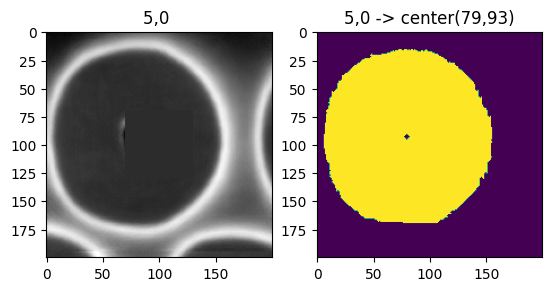

[-1  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18]
cricle_value is 9
105 91


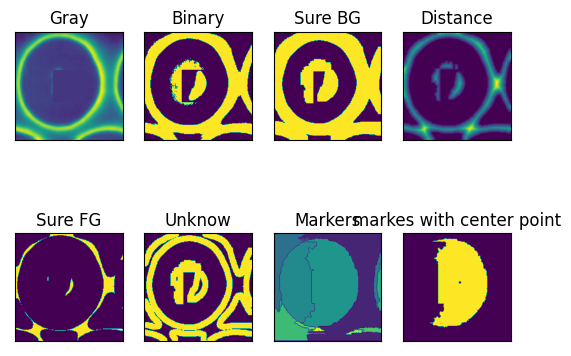

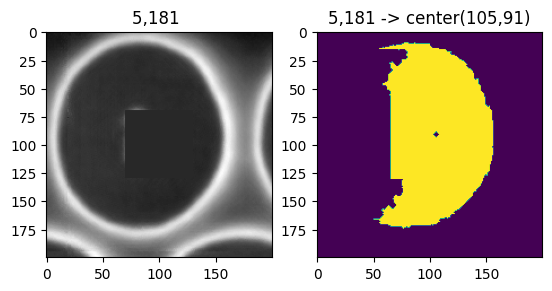

[-1  1  2  3  4  5  6  7  8  9 10]
cricle_value is 6
82 90


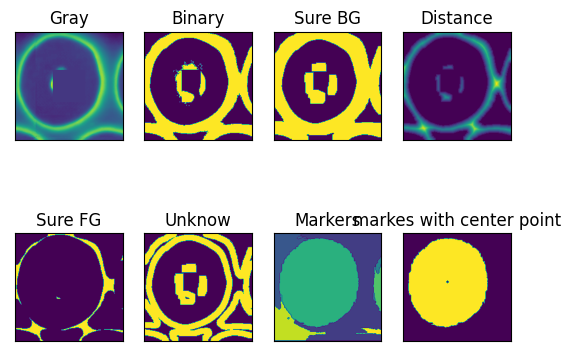

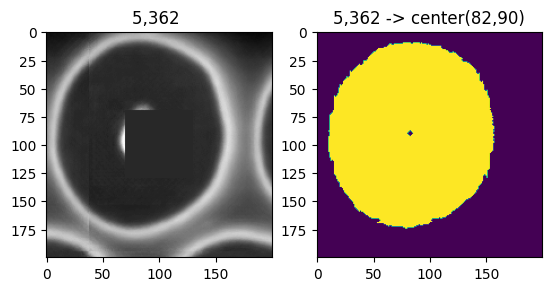

[-1  1  2  3  4  5  6  7  8  9 10]
cricle_value is 6
92 109


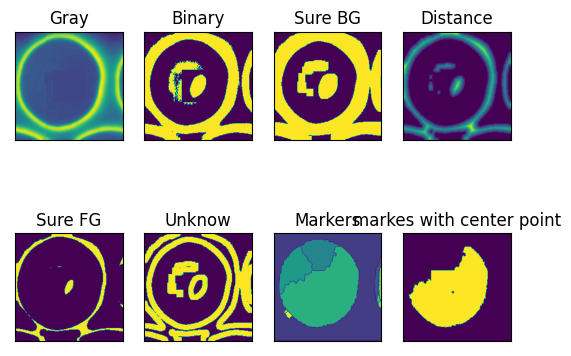

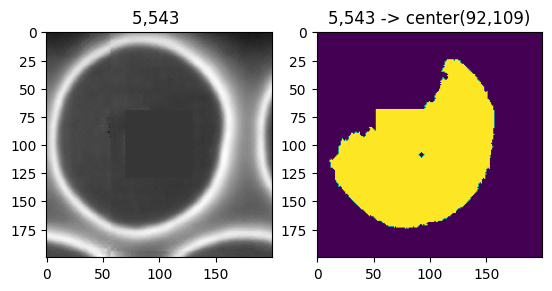

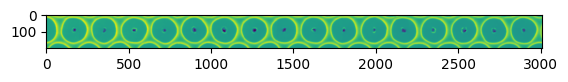

[-1  1  2  3  4  5  6  7]
cricle_value is 4
90 90


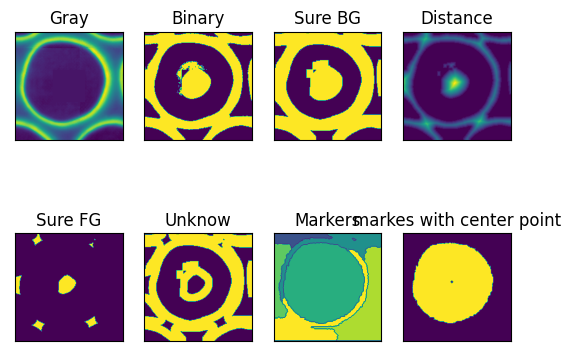

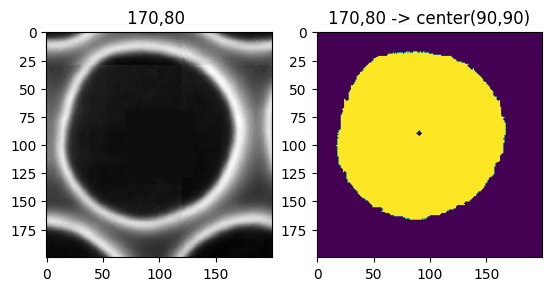

[-1  1  2  3  4  5  6]
cricle_value is 4
91 90


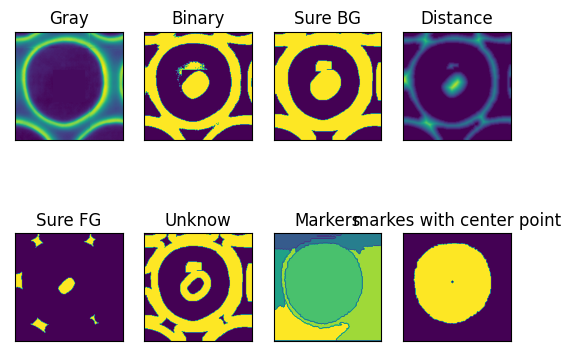

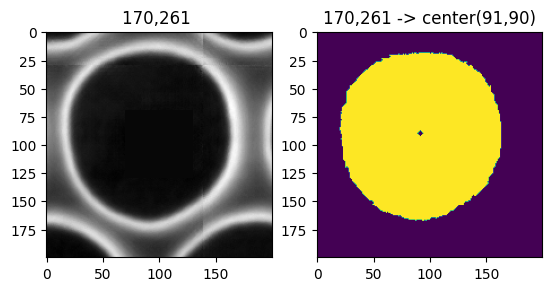

[-1  1  2  3  4  5  6]
cricle_value is 3
93 91


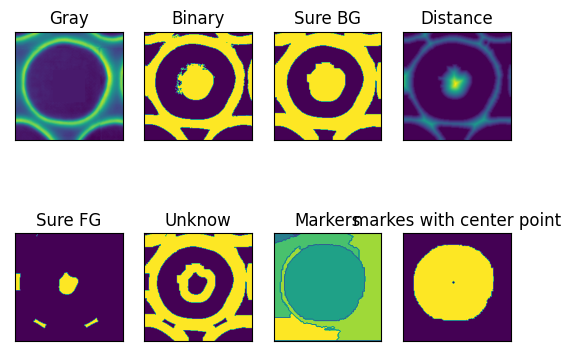

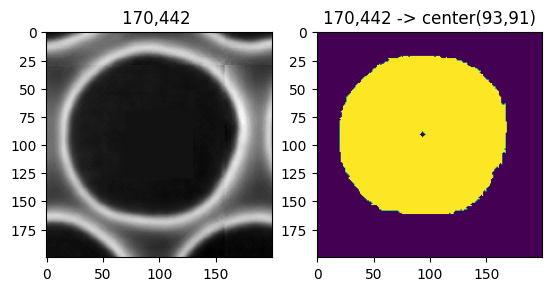

[-1  1  2  3  4  5  6]
cricle_value is 4
94 91


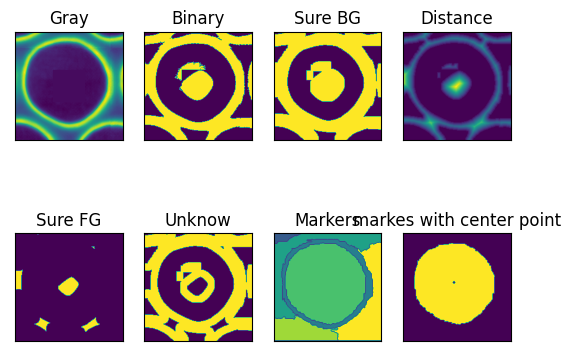

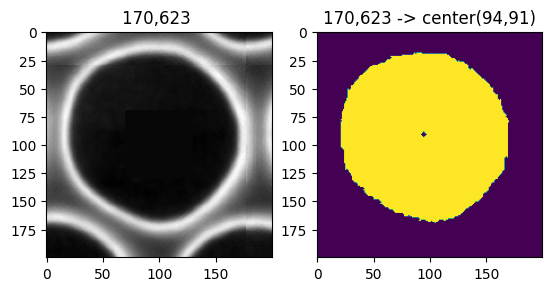

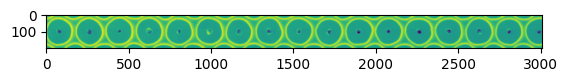

[-1  1  3  4  5  6  7  8  9]
cricle_value is 6
78 100


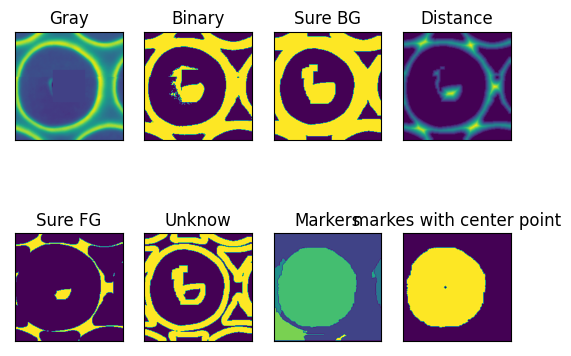

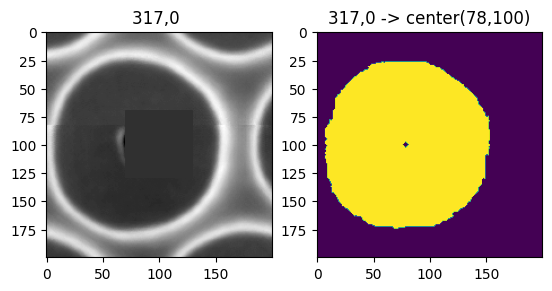

[-1  1  3  4  6  7  8]
cricle_value is 7
81 101


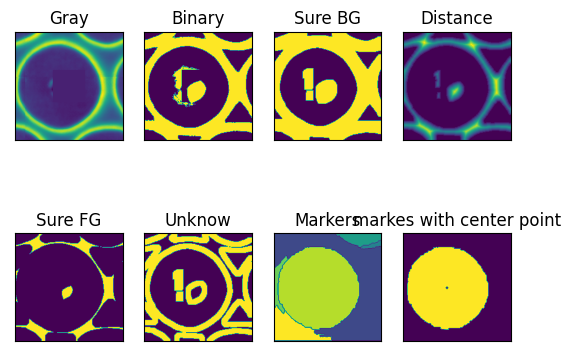

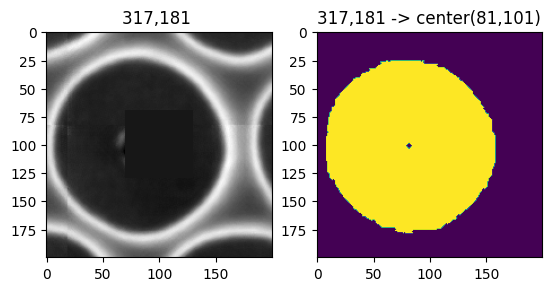

[-1  1  2  3  4  5  6  7  8  9]
cricle_value is 6
81 98


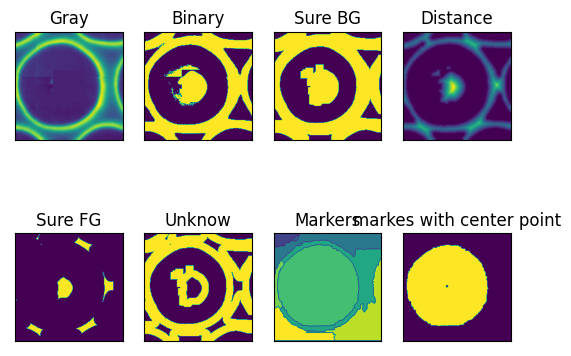

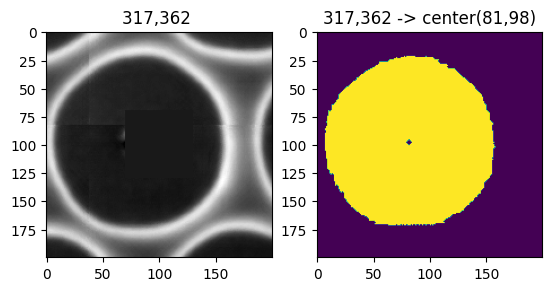

[-1  1  2  3  4  5  6  7  8  9 10]
cricle_value is 7
82 98


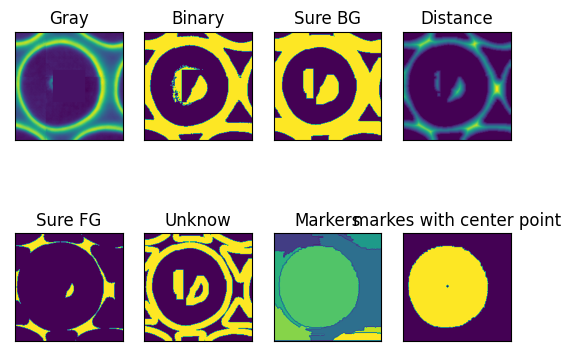

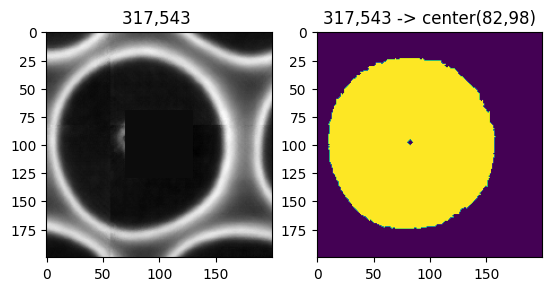

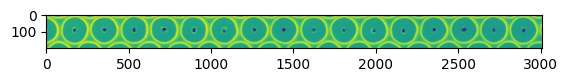

[-1  1  2  3  4  5  6  7  8]
cricle_value is 6
93 90


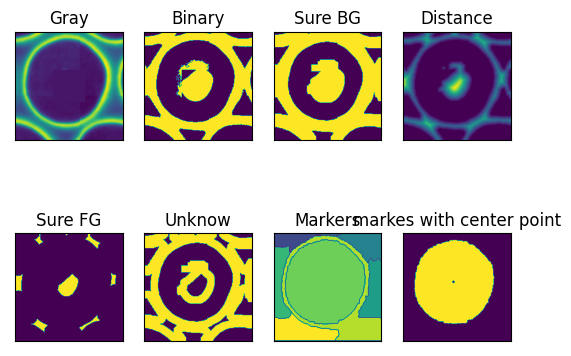

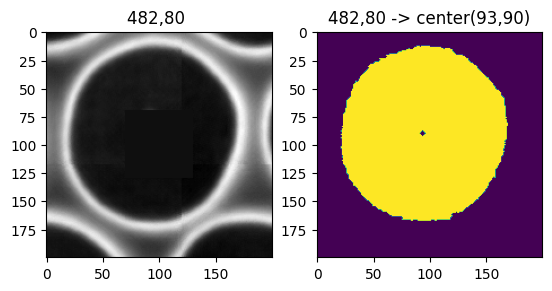

[-1  1  2  3  4  5  6]
cricle_value is 4
91 89


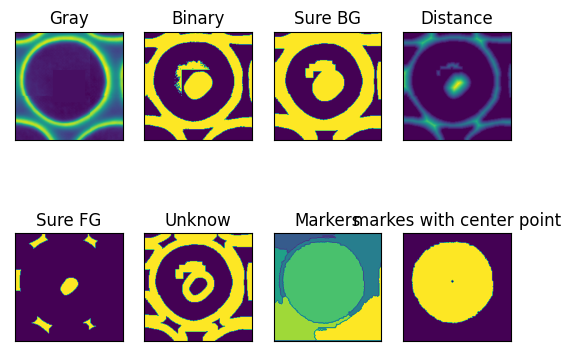

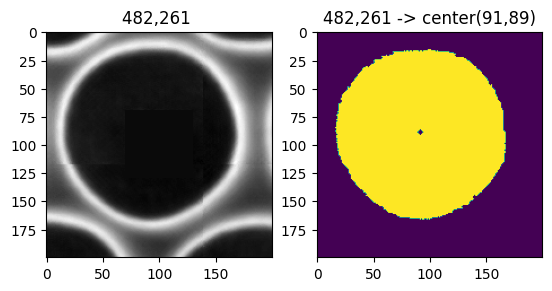

[-1  1  2  3  4  5  6  7]
cricle_value is 5
93 88


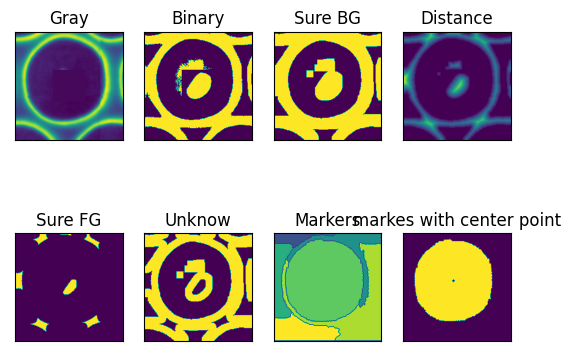

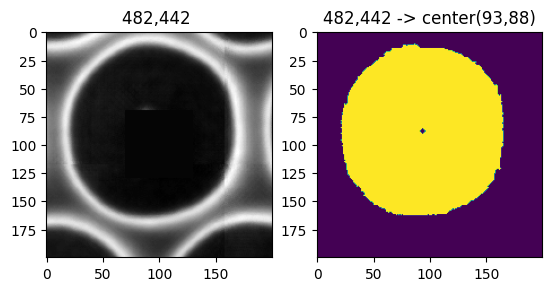

[-1  1  2  3  4  5  6  7  8]
cricle_value is 4
92 89


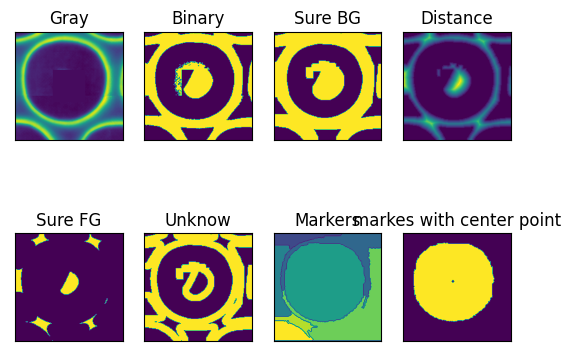

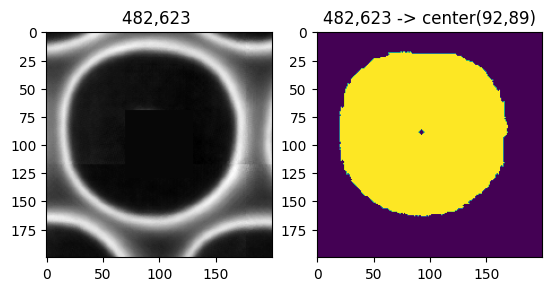

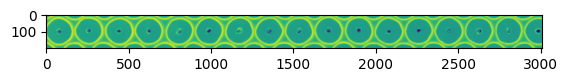

[-1  1  2  3  5  6  7  8  9]
cricle_value is 6
78 97


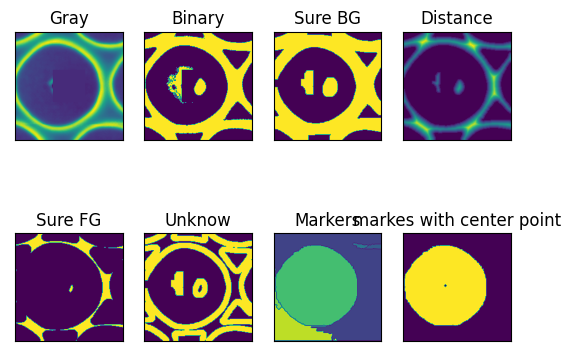

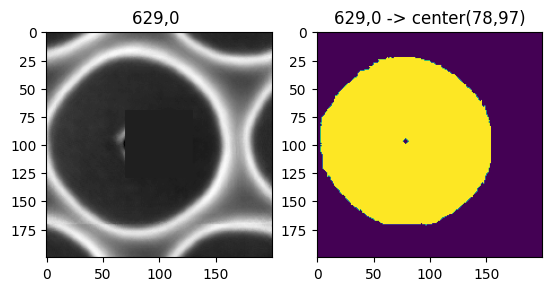

[-1  1  2  3  4  5]
cricle_value is 4
78 94


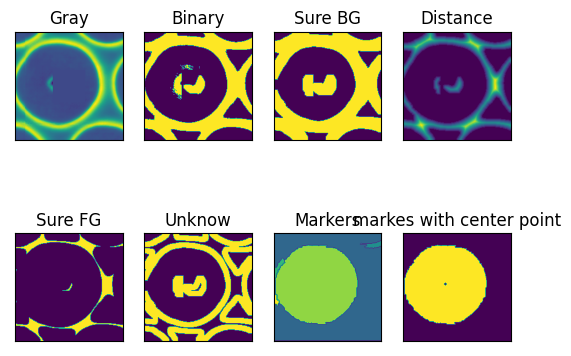

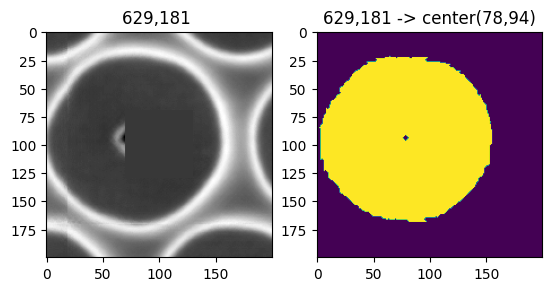

[-1  1  2  3  4  5  7  9 10 11]
cricle_value is 7
81 97


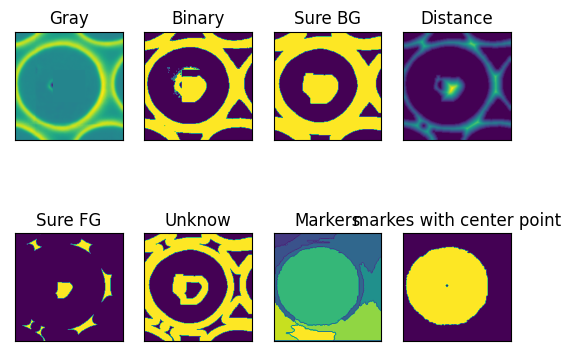

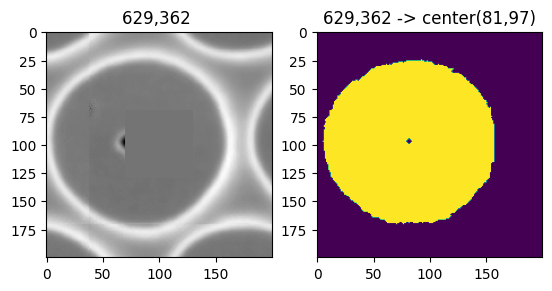

[-1  1  2  3  4  5  6  7  9]
cricle_value is 5
104 98


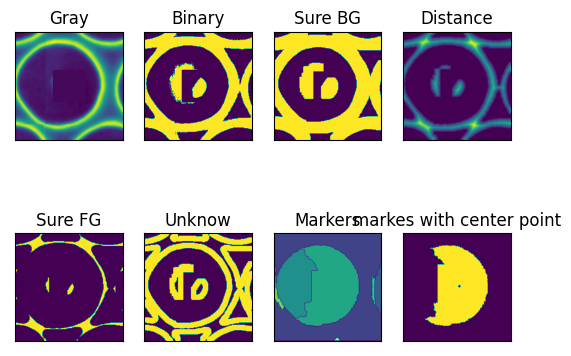

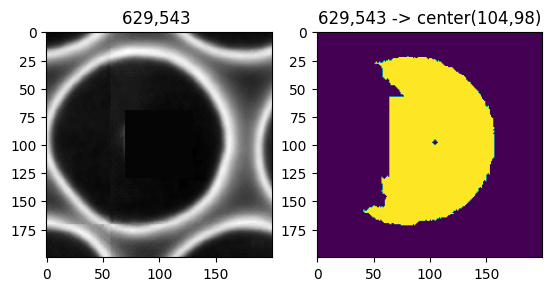

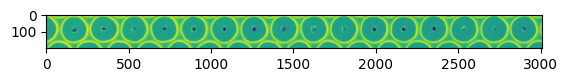

[-1  1  2  3  4  5  6  7]
cricle_value is 5
90 86


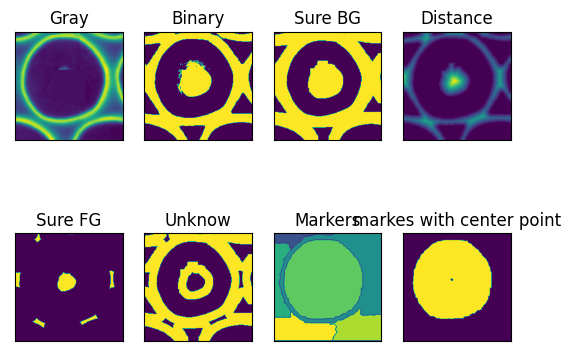

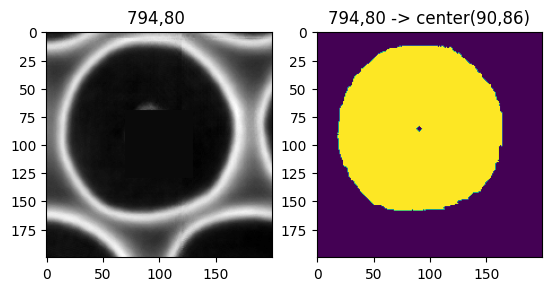

[-1  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]
cricle_value is 10
90 83


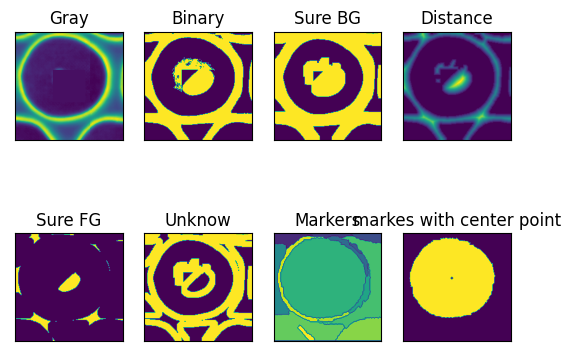

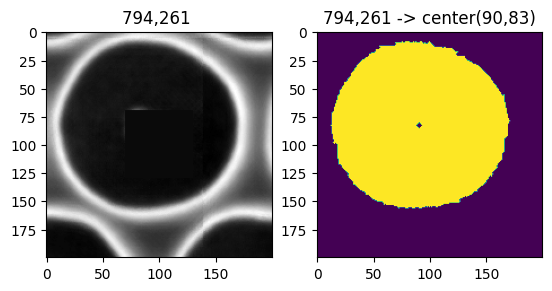

[-1  1  2  3  4  5  6  7  8]
cricle_value is 5
92 84


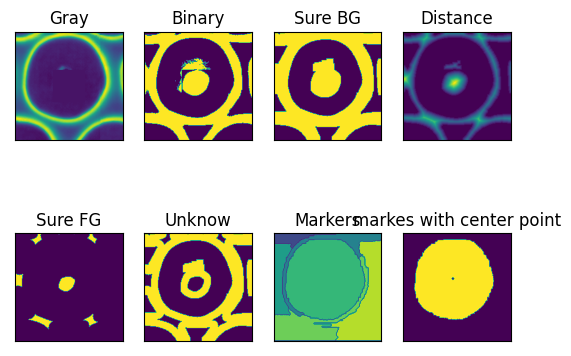

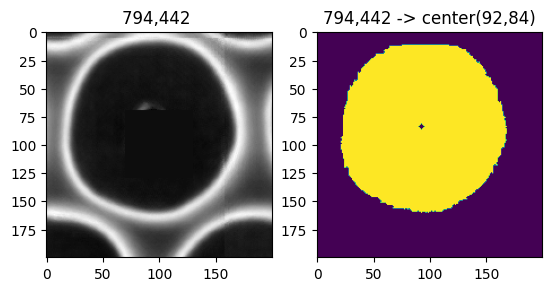

[-1  1  2  3  4  5  6  7]
cricle_value is 5
93 84


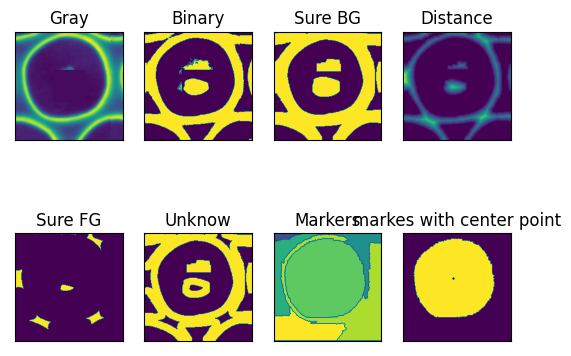

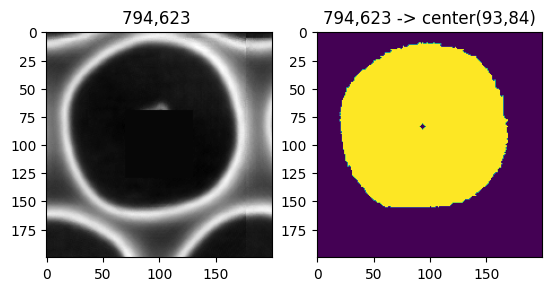

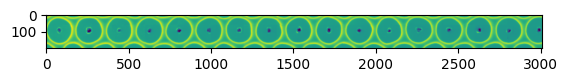

[-1  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
cricle_value is 7
80 93


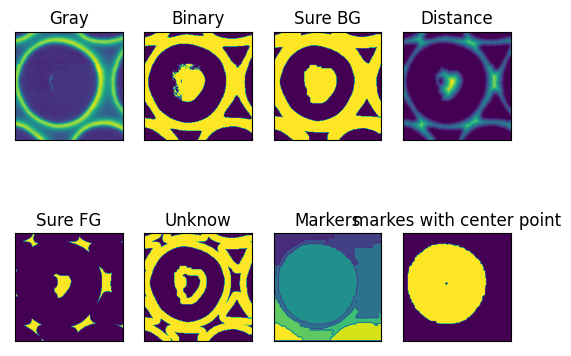

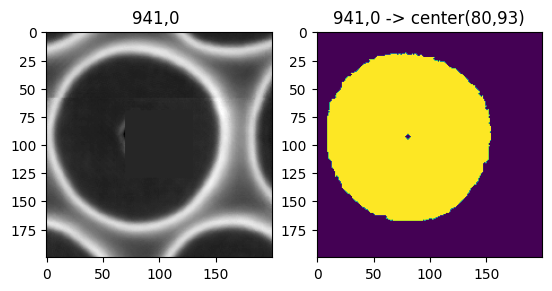

[-1  1  2  3  4  5  6  7  8  9 11]
cricle_value is 5
98 108


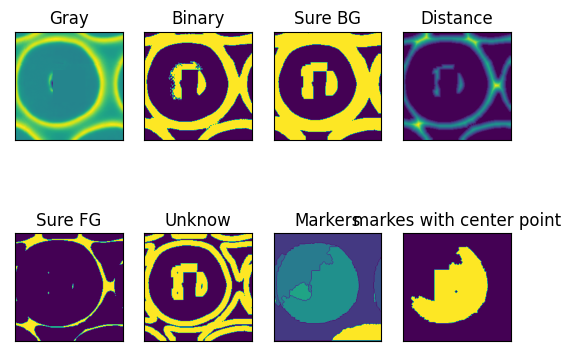

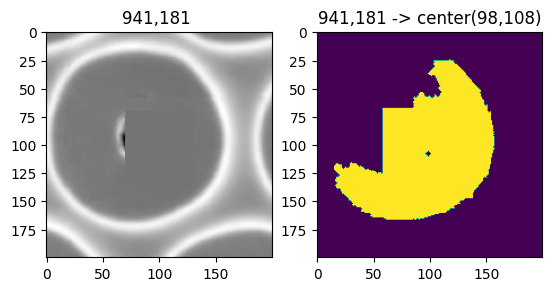

[-1  1  2  3  4  5  6  7  8  9]
cricle_value is 5
82 92


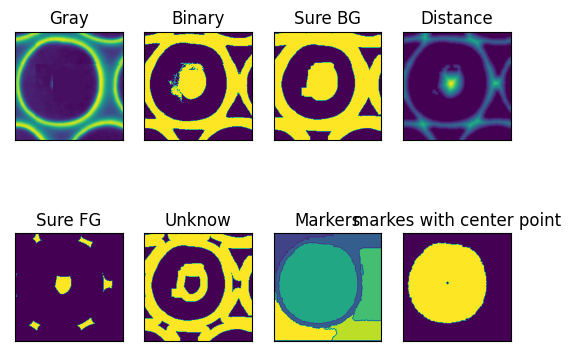

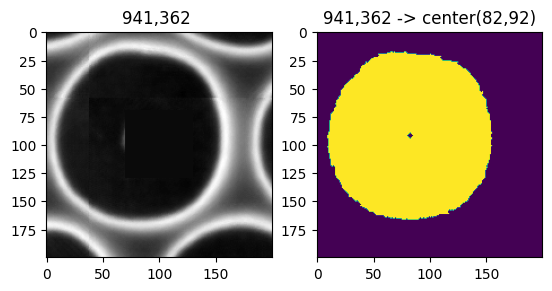

[-1  1  2  3  4  5  6  7  8  9 10 11 12 13]
cricle_value is 6
83 94


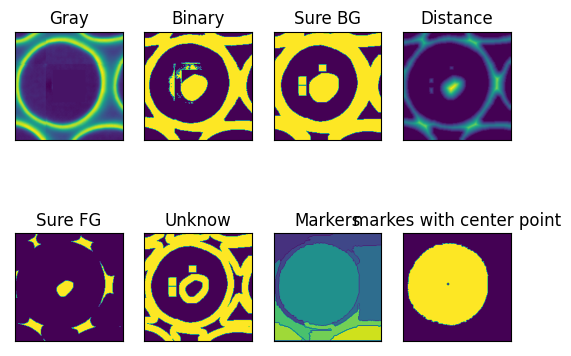

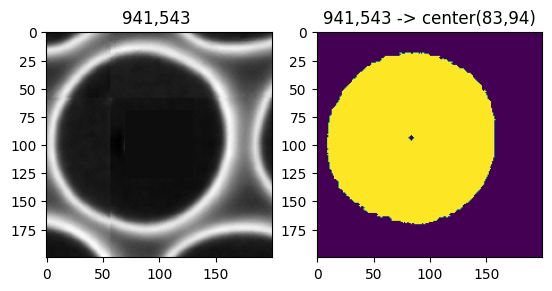

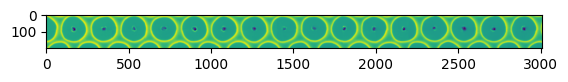

[-1  1  3  4  5  6  7  8  9 10]
cricle_value is 6
92 101


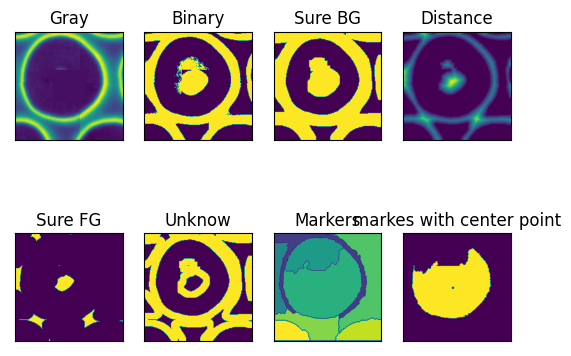

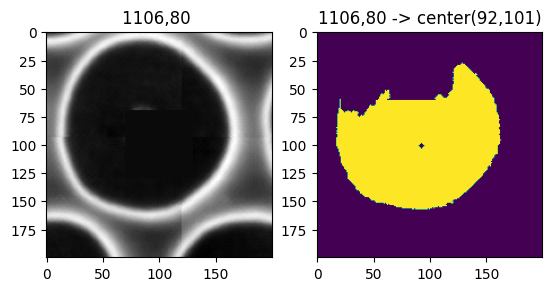

[-1  1  2  3  4  5]
cricle_value is 3
90 83


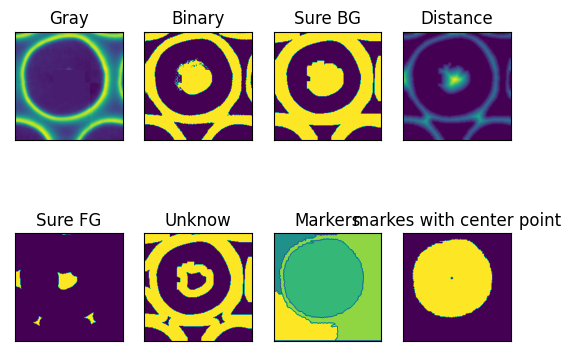

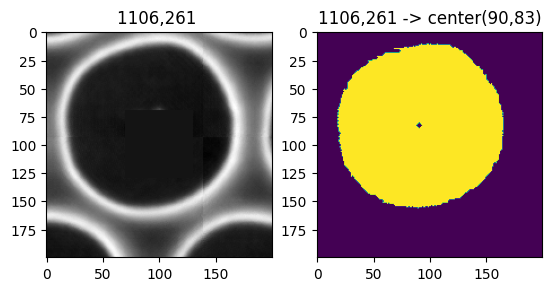

[-1  1  4  5]
cricle_value is 5
90 82


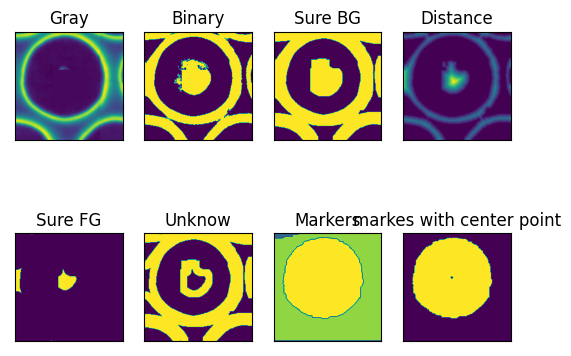

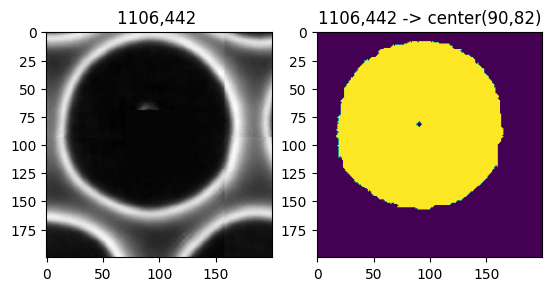

[-1  1  2  3  4  5  6  7  8  9 10 11 13]
cricle_value is 7
91 82


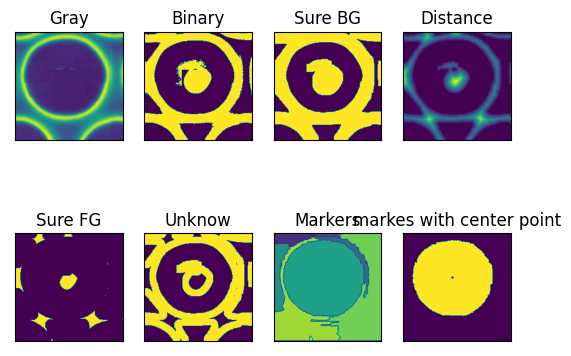

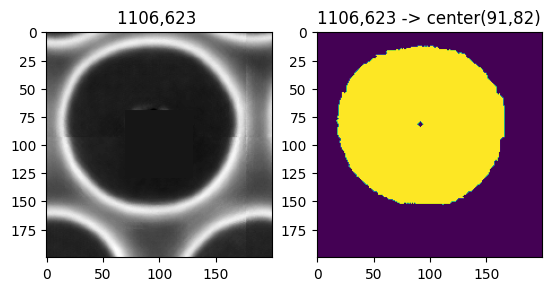

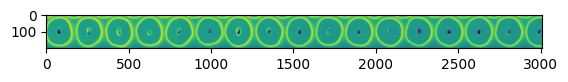

[-1  1  2  3  4  6  7  8  9 10]
cricle_value is 7
78 100


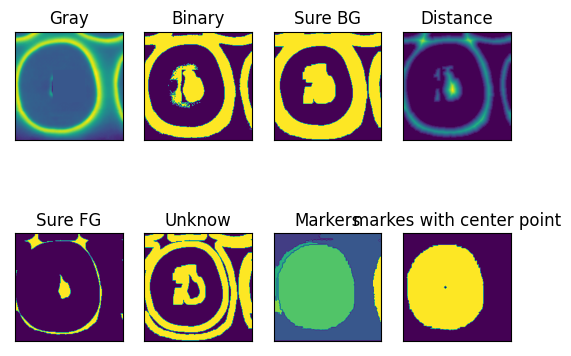

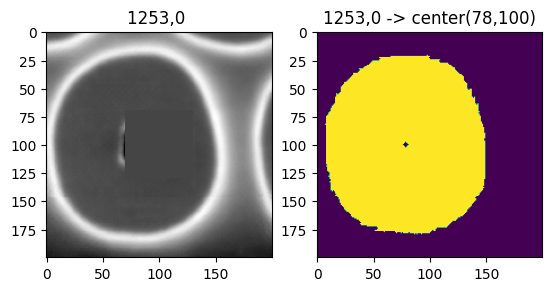

[-1  1  2  3  4  5  6  7  8  9]
cricle_value is 1
93 102


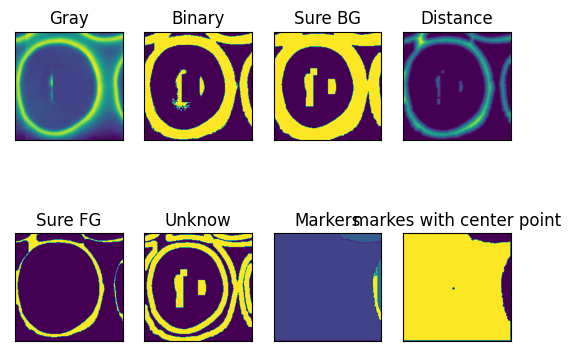

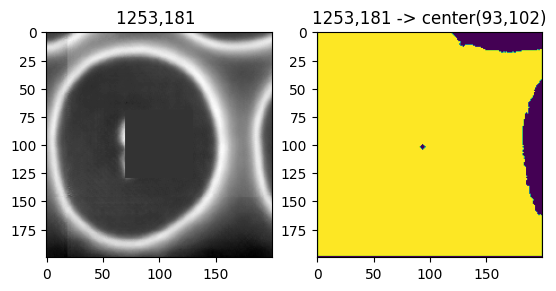

[-1  1  2  3  4  5  6  7  8  9 10 11]
cricle_value is 1
94 102


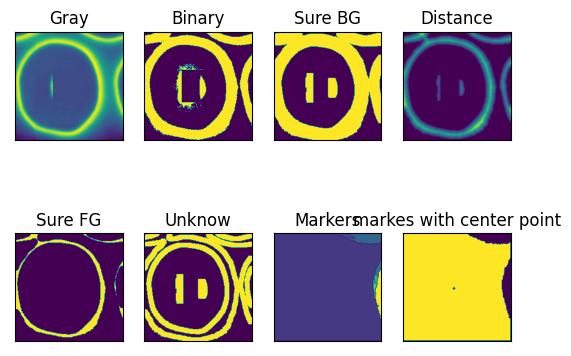

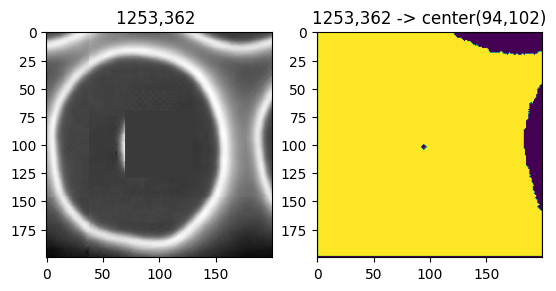

[-1  1  2  3  4  5]
cricle_value is 1
83 99


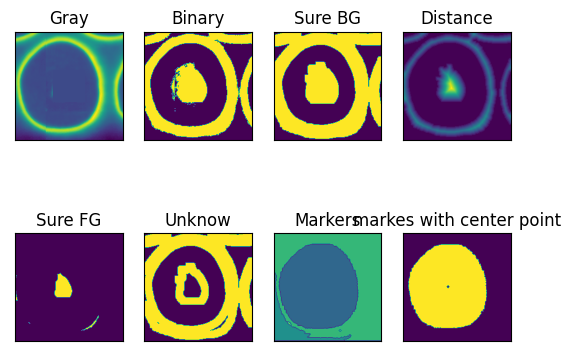

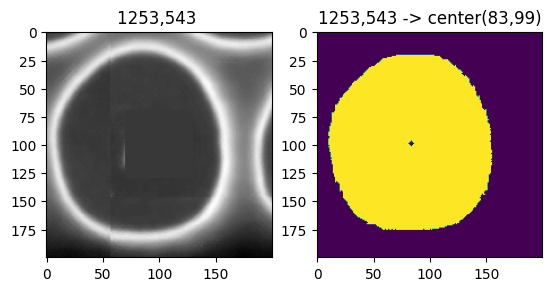

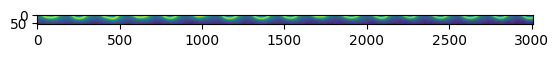

1418,80 img shape mismatch


SystemExit: -1

In [54]:

for set_path in sorted(os.listdir(data_path)):
    if debug is True:
        print(set_path)
    set_path = os.path.join(data_path,set_path)
    img_list = sorted(os.listdir(set_path))
    img_list = list(filter(lambda x : ".ipynb_checkpoints" not in x,img_list))
    if debug is True:
        print(img_list)
    for img_path in img_list:
        img_name = img_path
        img_path = os.path.join(set_path,img_path)
        if debug is True:
            print(img_path)
        img = cv2.imread(img_path,cv2.IMREAD_GRAYSCALE)
        if debug is True:
            print(img.shape)
        print(img_name)
        denoised_img = model.eval(img)
        # denoised_img = (denoised_img - denoised_img.mean())/(denoised_img.std())
        # denoised_img = (denoised_img - denoised_img.min())/(denoised_img.max()-denoised_img.min())
        # print(denoised_img.min(), denoised_img.max())
        denoised_img = (denoised_img*255).astype('uint8')
        watershed_per_img(img_name,denoised_img,
                          fill_range=30,debug=True,im_save=False)
        sys.exit(-1)